In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from lifelines.plotting import plot_lifetimes   
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Data read and clean

In [5]:
##  create a dataframe
#path = "C:\\Users\\Public\\data\\"
path = "/content/gdrive/My Drive/InMobi_data/"
filename = "churn_Day5.csv"
fq_name = path + filename
df = pd.read_csv(fq_name)
df.head()

,CreatorID,DayOfChurn,Churn
0,3c115da75bbb04a76eb48deb5e2af16a,49,1
1,09847f4c555a2533f9d1b0b185a2614a,7,1
2,dbc28af990c3c7f15f01e03e6f3ea282,24,1
3,fe7e77cc471372155c5155bc300a9218,5,1
4,96279f6cec1ac1b0498a3837d0b8bdb4,62,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304087 entries, 0 to 304086
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   CreatorID   304087 non-null  object
 1   DayOfChurn  304087 non-null  int64 
 2   Churn       304087 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 7.0+ MB


In [7]:
#check for null
df.isna().sum()

CreatorID     0
DayOfChurn    0
Churn         0
dtype: int64

# Survival Analysis with Kaplan Meier (non-parametric)

Fundamental concepts of Survival Analysis 
 

1. Survival time: Referred to an amount of time until when a customer is alive (not churned) or actively participates in a survey. 
2. Event: In our context, we define event as 'churn'. 
3. Censoring of data: Survival analysis focuses on the occurrence of an event of interest (e.g., churn). But there is still a possibility that the event may not be observed for various reasons. Such observations are known as censored observations. Censoring may arise in the following ways:
    * Customer hasn't churned during the time-period.   
    * Customer has churned OR isn't tracked anymore (perhaps they fell out of the study) - also called RIGHT Censoring
    * Left-censoring: Churn could not be observed for some reason - perhaps a customer already had churned when the experiment started  
    * Interval censoring: Customer churuned during the experiment, but not sure when, as ddata available only for some intervals. We will try to avoid left and interval censored data. 

4. Survival and hazard functions: We generally use two related probabilities to analyse survival data.
    * The survival probability: We will use Survivor function S(t), which is the Kaplan-Meier Estimator. Survival probability is the probability that a customer survives (stays) from the time of origin (e.g. date joined) to a specified future time t. For example, S(200) = 0.7 means that after 200 days has passed since the customer had joined, the customer's survival probability has dropped to 0.7. If the customer stays alive at the end of an experiment, then that data will be censored.
    * The hazard probability: Denoted by h(t) - the probability that a customer, who is under observation at a time t has churned ('event') at that time. For example, If h(200) = 0.7, then it means that the probability of that customer having churned at time t=200 days is 0.7.

Note that, in contrast to the survivor function, which focuses on not having an event, the hazard function focuses on the event occurring. Higher survival probability and lower hazard probability is good for business.


Source: https://www.kdnuggets.com/2020/07/complete-guide-survival-analysis-python-part1.html


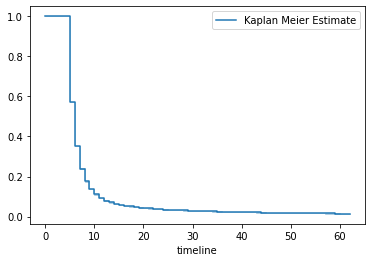

In [8]:
## Lets create an overall KaplanMeier curve, without breaking it into groups of covariates.

durations = df['DayOfChurn'] ## Time to event data of censored and event data
event_observed = df['Churn']  ## It has the churned (1) and censored is (0)

## create a kmf object as km
km = KaplanMeierFitter() ## instantiate the class to create an object

## Fit the data into the model
km.fit(durations, event_observed,label='Kaplan Meier Estimate')

## Create an estimate
km.plot()

How to read the above graph? At time t = 0, the survival probability of the entire cohort is 1. This is expected, as all in-scope customers are subscribed at the beginning of the study. At time t = 70 months, the survival proability drops to 0.6 . This means that at the end of 70 months, there is only a 60% chance that the a customer stays. 


How to read the Event table below? 

(1) Event_at: It stores the value of the timeline for our dataset, i.e., when was the customer observed in our experiment or when was the experiment conducted. It can be the number of minutes, days, months, years etc. In our case, it’s going to be the number of months. It basically stores the value of survival days for a customer.

(2) At_risk: It stores the number of current customers. At the start, it will be the total number of customers we are going to observe in our experiment. If at a certain time, new cutomers are added, then we have to increase it’s value accordingly. Basically, we can say that:

at_risk = current patients at_risk + entrance — removed

(3) Entrance: It stores the value of new customers in a given timeline. It’ possible that while we have other customers, some new customers also churned. That’s why we add it here.

(4) Censored: Our ultimate goal is to find the survival probability for a customer. If at a specific timeline customer under experiment is still alive, then that customer goes into the censored category. If we don’t have information about when a customer churned, then we add it to the censored data. Other possibilities are if a customer chooses drop out of study, we add that customer into the censored category.

(5) Observed: The number of customers that churned during the experiment.

(6) Removed: It stores the values of customers that are no longer part of our experiment. If a customer churned or is censored, then they fall into this category. In short,

Removed = Observed + Censored

In [9]:
km.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,304087,304087
5.0,130233,130233,0,0,304087
6.0,66556,66556,0,0,173854
7.0,34692,34692,0,0,107298
8.0,19168,19168,0,0,72606
9.0,11744,11744,0,0,53438
10.0,8154,8154,0,0,41694
11.0,5478,5478,0,0,33540
12.0,3780,3780,0,0,28062


In [10]:
km.predict(11)

0.09228280064586783

In [11]:
km.survival_function_

,Kaplan Meier Estimate
timeline,
0.0,1.000000
5.0,0.571725
6.0,0.352853
7.0,0.238767
8.0,0.175733
9.0,0.137112
10.0,0.110297
11.0,0.092283
12.0,0.079852


## NOT DONE! Kaplan Meier for cohorts

Calculate survival probability for each cohort and compare. Remember time is the same as tenure, and the event is the churn. The next section compares survival rate of each cohort created on the basis of contract term

In [1]:
# kmf = KaplanMeierFitter() 


# T = df['tenure']     ## time to event
# E = df['Churn']      ## event occurred or censored


# groups = df['Contract']             ## Create the cohorts from the 'Contract' column
# ix1 = (groups == 'Month-to-month')   ## Cohort 1
# ix2 = (groups == 'Two year')         ## Cohort 2
# ix3 = (groups == 'One year')         ## Cohort 3


# kmf.fit(T[ix1], E[ix1], label='Month-to-month')    ## fit the cohort 1 data
# ax = kmf.plot()


# kmf.fit(T[ix2], E[ix2], label='Two year')         ## fit the cohort 2 data
# ax1 = kmf.plot(ax=ax)


# kmf.fit(T[ix3], E[ix3], label='One year')        ## fit the cohort 3 data
# kmf.plot(ax=ax1)                                 ## Plot the KM curve for three cohort on same x and y axis

So, the customers having two-year contracts are most likely to stay. Customers month-to-month shows a drop show at the very begining - any way they can be reached in the initial stages to prevent them from leaving? 

In [2]:
# kmf.predict(11)

In [3]:

# kmf1 = KaplanMeierFitter() ## instantiate the class to create an object

# ## Two Cohorts are compared. 1. Streaming TV Not Subsribed by Users, 2. Streaming TV subscribed by the users.
# groups = df['StreamingTV']   
# i1 = (groups == 'No')      ## group i1 , having the pandas series for the 1st cohort
# i2 = (groups == 'Yes')     ## group i2 , having the pandas series for the 2nd cohort


# ## fit the model for 1st cohort
# kmf1.fit(T[i1], E[i1], label='Not Subscribed StreamingTV')
# a1 = kmf1.plot()

# ## fit the model for 2nd cohort
# kmf1.fit(T[i2], E[i2], label='Subscribed StreamingTV')
# kmf1.plot(ax=a1)

Another cohort comparison above

# Estimating hazard using Nelson-Aalen

Hazard function:

The survival functions are a great way to summarize and visualize the survival dataset. However, it is not the only way. If we are curious about the hazard function h(t) of a population, we, unfortunately, can’t transform the Kaplan Meier estimate. For that, we use the Nelson-Aalen hazard function:


![Screen%20Shot%202021-02-07%20at%2011.39.34%20PM.png](attachment:Screen%20Shot%202021-02-07%20at%2011.39.34%20PM.png)


In [12]:
from lifelines import NelsonAalenFitter

In [13]:
naf = NelsonAalenFitter()

durations = df['DayOfChurn'] ## Time to event data of censored and event data
event_observed = df['Churn']  ## It has the churned (1) and censored is (0)

naf.fit(durations, event_observed, label = 'hazard using Nelson Aalen')

<lifelines.NelsonAalenFitter:"hazard using Nelson Aalen", fitted with 304087 total observations, 4174 right-censored observations>

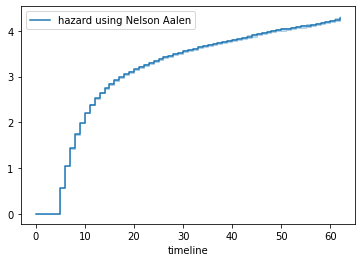

In [14]:
naf.plot()

In [15]:
naf.cumulative_hazard_

,hazard using Nelson Aalen
timeline,
0.0,0.000000
5.0,0.559097
6.0,1.041701
7.0,1.432261
8.0,1.738784
9.0,1.986946
10.0,2.204562
11.0,2.382881
12.0,2.527560


# NOT DONE! Log-Rank Test

Goal: Here, our goal is to see if there is any significant difference between the groups being compared.

Null Hypothesis: The null hypothesis states that there is no significant difference between the groups being studied. If there is a significant difference between these groups, then we have to reject our null hypothesis.

How do we say that there is a significant difference?

The statistical significance is denoted by a p-value between 0 and 1. The smaller the p-value, the greater the statistical difference between groups being studied.

In [4]:
# from lifelines.statistics import logrank_test

In [5]:
# T = df['tenure']     ## time to event
# E = df['Churn']      ## event occurred or censored

# groups = df['StreamingTV']   
# i1 = (groups == 'No')      ## group i1 , having the pandas series for the 1st cohort
# i2 = (groups == 'Yes')     ## group i2 , having the pandas series for the 2nd cohort

# results = logrank_test(T[i1],T[i2],E[i1],E[i2])
# results.print_summary()


p-value of less than 0.005 rejects the null hypothesis that there is no significant difference between groups having streaming TV and not having it.

# NOT DONE! Cox Proportional Hazard Model (Survival Regression)

The Cox proportional hazard model is basically a regression model generally used by medical researchers to find out the relationship between the survival time of a subject and one or more predictor variables. In short, we want to find out how different parameters like age, sex, weight, height affects the length of survival for a subject.

Basics of the Cox proportional hazard method:

The ultimate purpose of the Cox proportional hazard method is to notice how different factors in our dataset impact the event of interest.

Hazard function:

![Screen%20Shot%202021-02-09%20at%208.37.08%20PM.png](attachment:Screen%20Shot%202021-02-09%20at%208.37.08%20PM.png)



![Screen%20Shot%202021-02-09%20at%208.37.54%20PM.png](attachment:Screen%20Shot%202021-02-09%20at%208.37.54%20PM.png)

In [ ]:
from lifelines import CoxPHFitter

In [6]:
# ## Only using the subset of the columns present in the original data
# df_r= df.loc[:,['tenure','Churn','gender','Partner','Dependents','PhoneService','MonthlyCharges','SeniorCitizen','StreamingTV']]
# df_r.head() ## have a look at the data

In [7]:
# ## Create dummy variables
# df_dummy = pd.get_dummies(df_r, drop_first=True)
# df_dummy.head()

In [8]:

# # Using Cox Proportional Hazards model
# cph = CoxPHFitter()   ## Instantiate the class to create a cph object
# cph.fit(df_dummy, 'tenure', event_col='Churn')   ## Fit the data to train the model
# cph.print_summary()    ## HAve a look at the significance of the features

In [9]:
# cph.plot()

In [10]:
# ## We want to see the Survival curve at the customer level. Therefore, we have selected 6 customers (rows 5 till 9).

# tr_rows = df_dummy.iloc[5:10, 2:]
# tr_rows

In [11]:
## Lets predict the survival curve for the selected customers. 
## Customers can be identified with the help of the number mentioned against each curve.
# cph.predict_survival_function(tr_rows).plot()